# Assignment 5 Questions

## Problem Statement

#### Task 1:

Read the dataset from the bellow link

url = https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv


In [27]:
import pandas as pd
import numpy as np

In [40]:
#url = 'https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv'

df = pd.read_csv(url )

df.head()


,year,name,percent,sex
0,1880,John,0.081541,boy
1,1880,William,0.080511,boy
2,1880,James,0.050057,boy
3,1880,Charles,0.045167,boy
4,1880,George,0.043292,boy


Questions

1. Delete unnamed columns

# There is no unnamed columns in dataframe


2. Show the distribution of male and female

In [60]:
df['sex'].describe()

count     258000
unique         2
top         girl
freq      129000
Name: sex, dtype: object

3. Show the top 5 most preferred names

In [41]:
df['name'].head(5)

0       John
1    William
2      James
3    Charles
4     George
Name: name, dtype: object

4. What is the median name occurence in the dataset

In [42]:
df['name'].median

<bound method Series.median of 0             John
1          William
2            James
3          Charles
4           George
            ...   
257995    Carleigh
257996       Iyana
257997      Kenley
257998      Sloane
257999     Elianna
Name: name, Length: 258000, dtype: object>

5. Distribution of male and female born count by states

In [63]:
df['sex'].value_counts()

girl    129000
boy     129000
Name: sex, dtype: int64

#### Task 2:

We have the min and max temperatures in a city In India for each months of the year. We
would like to find a function to describe this and show it graphically, the dataset given below.

    Task:
    1. fitting it to the periodic function
    2. plot the fit
    
    Data
    Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
    Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18


Text(0, 0.5, 'Min and max temperature')

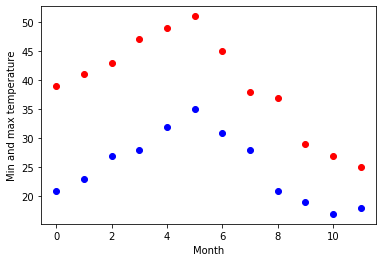

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months = np.arange(12)
plt.plot(months, temp_max, 'ro')
plt.plot(months, temp_min, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

# Periodic function

In [55]:

from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

# Plotting

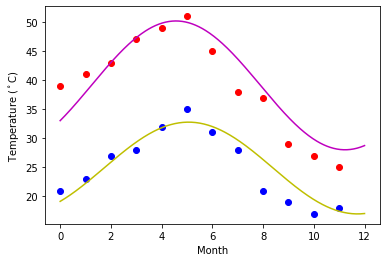

In [56]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()